In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'
import numpy as np
import pandas as pd
import os
import sys
from adjustText import adjust_text
sys.path.append('..')

In [2]:
from Util import Globals
from Util import Parser

In [3]:
def collect_averages(dataset_ids):
    results = []
    for dataset_id in dataset_ids:
        inst_dict = instability_average(dataset_id)
        ar_dict = ar_average(dataset_id)

        technique_list = sorted(ar_dict)
        for i, technique in enumerate(technique_list):
            results.append([dataset_id, Globals.acronyms[technique], i, ar_dict[technique], inst_dict[technique]])

    df = pd.DataFrame(results, columns=['dataset', 'technique', 'label', 'ar', 'inst'])
    return df


def instability_average(dataset_id):
    ct_df = Parser.read_ct_metric(dataset_id)
    rpc_df = Parser.read_rpc_metric(dataset_id)

    means = {}

    technique_list = sorted(rpc_df)
    for i, technique_id in enumerate(technique_list):
        technique_means = []
        for revision in range(int(len(rpc_df[technique_id].columns) / 2)):
            r_col = 'r_' + str(revision)
            b_col = 'b_' + str(revision)
            diff = rpc_df[technique_id][[r_col, b_col]].max(axis=1) - rpc_df[technique_id][b_col]
            ct_mean = diff.dropna().mean()

            r_col = 'r_' + str(revision)
            b_col = 'b_' + str(revision)
            diff = ct_df[technique_id][[r_col, b_col]].max(axis=1) - ct_df[technique_id][b_col]
            rpc_mean = diff.dropna().mean()

            technique_means.append((ct_mean + rpc_mean) / 2)

        means[technique_id] = np.mean(technique_means)

    return means


def ar_average(dataset_id):
    ar_df = Parser.read_aspect_ratios(dataset_id)
    means = {}

    technique_list = sorted(ar_df)
    for i, technique_id in enumerate(technique_list):
        technique_means = []
        for revision in range(int(len(ar_df[technique_id].columns) / 2)):
            # df = ar_df[technique_id]
            w_col = 'w_' + str(revision)
            ar_col = 'ar_' + str(revision)

            u_avg = ar_df[technique_id][ar_col].mean(axis=0)
            w_avg = np.average(ar_df[technique_id][ar_col].dropna(), weights=ar_df[technique_id][w_col].dropna())

            technique_means.append((u_avg + w_avg)/2)

        means[technique_id] = np.mean(technique_means)

    return means

In [4]:
# dataset_ids = {'DutchNames',
#                 'gh-FlycoTabLayout-m.data',
#                 'gh-pybind11-m.data',
#                 'GitHubAnimate',
#                 'GitHubExo'}
dataset_ids = open('../tvcg-datasets.txt', 'r').readlines()
dataset_ids = [d.replace('\n','') for d in dataset_ids]

In [5]:
averages = collect_averages(dataset_ids)

In [6]:
# Remove '.data' from name
averages['dataset'] = averages['dataset'].str.replace(r'.data$', '')

In [7]:
# sorted(averages['dataset'].unique())

In [8]:
dataset_features = pd.read_csv('datasetsClassified.csv', sep='\t')
sorted(dataset_features['title'].unique())

['DutchNames',
 'GitHubAnimate',
 'GitHubBdb',
 'GitHubBeets',
 'GitHubBrackets',
 'GitHubCaffe',
 'GitHubCalcuta',
 'GitHubCpython',
 'GitHubEarthdata-search',
 'GitHubEmcee',
 'GitHubExo',
 'GitHubFsharp',
 'GitHubGimp',
 'GitHubHospitalrun-frontend',
 'GitHubHystrix',
 'GitHubIina',
 'GitHubJenkins',
 'GitHubLeaflet',
 'GitHubOptiKey',
 'GitHubOsquery',
 'GitHubPhysicsJS',
 'GitHubPybuilder',
 'GitHubScikitlearn',
 'GitHubShellcheck',
 'GitHubSoundnode-app',
 'GitHubSpacemacs',
 'GitHubStandard',
 'GitHubUws',
 'GithubAudioKit',
 'Movies15M1D',
 'Movies3Y3M',
 'MoviesC4Y90H',
 'MoviesH22Y7M',
 'MoviesHC10Y2M',
 'MoviesHC9Y1W',
 'MoviesHC9Y7M',
 'UNContradeCoffee',
 'WorldBankExports',
 'WorldbankHIV',
 'atp-losses-country-player',
 'atp-matches-allplayers-height',
 'atp-matches-top20players-rank',
 'atp-wins-country-player',
 'earthquake-count-per-lat-long',
 'gh-AVLoadingIndicatorView-m',
 'gh-AndroidNetworking-m',
 'gh-AndroidNote-m',
 'gh-DCGAN-tensorflow-m',
 'gh-FileDownloader-

In [10]:
averages = pd.merge(averages, dataset_features, how='inner', left_on='dataset', right_on='title')
averages

,dataset,technique,label,ar,inst,title,maxNodes,timesteps,depthCategory,sizeVarianceCategory,sizeChangeCategory,dataChangeCategory
0,wb-EN.ATM.CO2E.LF.ZS.dataflat,APP,0,0.643784,0.254354,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
1,wb-EN.ATM.CO2E.LF.ZS.dataflat,HIL,1,0.543812,0.206882,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
2,wb-EN.ATM.CO2E.LF.ZS.dataflat,MOO,2,0.556090,0.055401,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
3,wb-EN.ATM.CO2E.LF.ZS.dataflat,LM4,3,0.587856,0.002761,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
4,wb-EN.ATM.CO2E.LF.ZS.dataflat,LM0,4,0.589242,0.002805,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
5,wb-EN.ATM.CO2E.LF.ZS.dataflat,PBM,5,0.635424,0.209689,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
6,wb-EN.ATM.CO2E.LF.ZS.dataflat,PBZ,6,0.692779,0.297089,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
7,wb-EN.ATM.CO2E.LF.ZS.dataflat,PBS,7,0.659116,0.218867,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
8,wb-EN.ATM.CO2E.LF.ZS.dataflat,SND,8,0.005707,0.000662,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
9,wb-EN.ATM.CO2E.LF.ZS.dataflat,SPI,9,0.423513,0.291993,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change


In [11]:
depthCategories = ['Single level', '2 or 3 levels', '4+ levels']
sizeVarianceCategories = ['Low variance' ,'High variance']
sizeChangeCategories = ['Low size change', 'Regular size change', 'Spiky size change']
dataChangeCategories = ['Low data change', 'Regular data change', 'Spiky data change']

In [12]:
def draw_bar_chart(filtered, combination_string, ylim=False):
    fig, ax = plt.subplots(1, 2)
    bar_width = 0.55

    index = np.arange(1, len(filtered)+1)
    filtered = filtered.sort_values(by='ar', ascending=False)
    colors = [Globals.tech_to_color[next(key for key, value in Globals.acronyms.items() if value == tech)] for tech in filtered['technique']]
    ax[0].bar(index, filtered['ar'], bar_width, color=colors)
    ax[0].set_xticks(index + bar_width / 2)
    ax[0].set_xticklabels(filtered['technique'], rotation=90)
    ax[0].set_title('Visual quality')
    ax[0].yaxis.tick_left()
    ax[0].tick_params(axis='x',which='both',bottom=False, top=False, labelbottom=True)

#     index = np.arange(0.2, len(filtered))
    index = np.arange(1, len(filtered)+1)
    filtered = filtered.sort_values(by='inst', ascending=False)
    colors = [Globals.tech_to_color[next(key for key, value in Globals.acronyms.items() if value == tech)] for tech in filtered['technique']]
    ax[1].bar(index, filtered['inst'], bar_width, color=colors)
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(index + bar_width / 2)
    ax[1].set_xticklabels(filtered['technique'], rotation=90)
    ax[1].set_title('Instability')
    ax[1].tick_params(axis='x',which='both',bottom=False, top=False, labelbottom=True)

    if ylim:
        ax[0].set_ylim(0, 1)
        ax[1].set_ylim(0, .5)
    
    plt.show()
    if ylim:
        fig.savefig('bar_charts/ylim - {}.png'.format(combination_string))
    else:
        fig.savefig('bar_charts/noylim - {}.png'.format(combination_string))
        

In [80]:
def draw_rank_chart(filtered, combination_string, ylim=False):
    fig, ax = plt.subplots(figsize=(3,3))

    filtered = filtered.sort_values(by='ar', ascending=True)
    cur_height = 0
    for i, row in filtered.iterrows():
        tech_full_name = next(key for key, value in Globals.acronyms.items() if value == row['technique'])
        color = Globals.tech_to_color[tech_full_name]
        rect = patches.Rectangle((0, cur_height), .5, 1, 
                                 linewidth=1, edgecolor=color,facecolor=color)
        ax.add_patch(rect)

        text = '{} {:.2f}'.format(row['technique'], row['ar'])
        ax.text(.25, cur_height, text,
                ha='center', va='bottom', zorder=11, fontsize=14)

        cur_height += 1


    filtered = filtered.sort_values(by='inst', ascending=False)
    cur_height = 0
    for i, row in filtered.iterrows():
        tech_full_name = next(key for key, value in Globals.acronyms.items() if value == row['technique'])
        color = Globals.tech_to_color[tech_full_name]
        rect = patches.Rectangle((.5, cur_height), .5, 1, 
                                 linewidth=1, edgecolor=color,facecolor=color)
        ax.add_patch(rect)

        text = '{} {:.3f}'.format(row['technique'], row['inst'])
        ax.text(.75, cur_height, text,
                ha='center', va='bottom', zorder=11, fontsize=14)

        cur_height += 1

    ax.set_xlim(left=0, right=1)
    ax.set_ylim(bottom=0, top=len(filtered))
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    plt.tight_layout()
    plt.show()
    fig.savefig('rank_chart/{}.png'.format(combination_string))

0000-Low weight variance-Low insertions and deletions-Single level-Low weight change


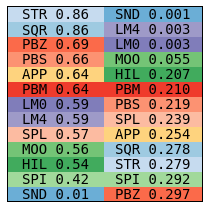

0001-Low weight variance-Low insertions and deletions-Single level-Regular weight change


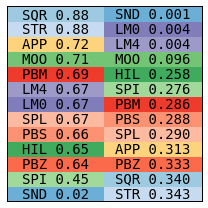

0002-Low weight variance-Low insertions and deletions-Single level-Spiky weight change


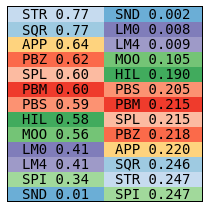

0010-Low weight variance-Low insertions and deletions-2 or 3 levels-Low weight change


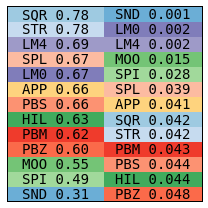

0011-Low weight variance-Low insertions and deletions-2 or 3 levels-Regular weight change


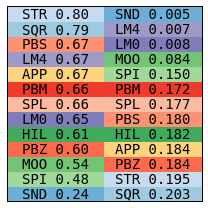

0012-Low weight variance-Low insertions and deletions-2 or 3 levels-Spiky weight change


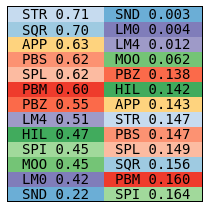

0020-Low weight variance-Low insertions and deletions-4+ levels-Low weight change


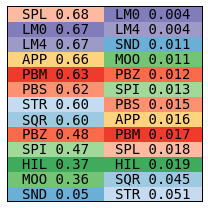

0021-Low weight variance-Low insertions and deletions-4+ levels-Regular weight change


/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  'bottom=%s, top=%s') % (bottom, top))


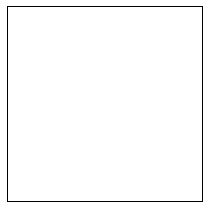

0022-Low weight variance-Low insertions and deletions-4+ levels-Spiky weight change


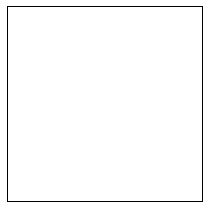

0100-Low weight variance-Regular insertions and deletions-Single level-Low weight change


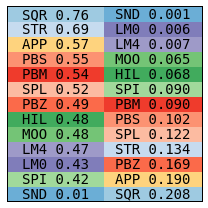

0101-Low weight variance-Regular insertions and deletions-Single level-Regular weight change


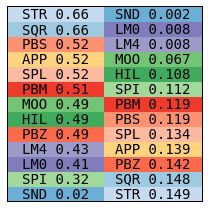

0102-Low weight variance-Regular insertions and deletions-Single level-Spiky weight change


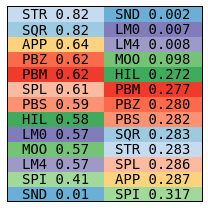

0110-Low weight variance-Regular insertions and deletions-2 or 3 levels-Low weight change


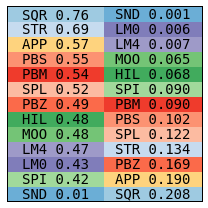

0111-Low weight variance-Regular insertions and deletions-2 or 3 levels-Regular weight change


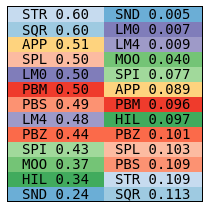

0112-Low weight variance-Regular insertions and deletions-2 or 3 levels-Spiky weight change


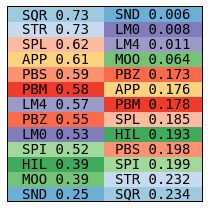

0120-Low weight variance-Regular insertions and deletions-4+ levels-Low weight change


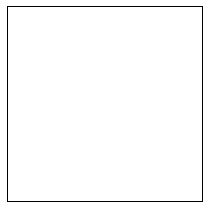

0121-Low weight variance-Regular insertions and deletions-4+ levels-Regular weight change


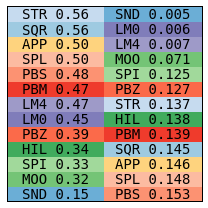

0122-Low weight variance-Regular insertions and deletions-4+ levels-Spiky weight change


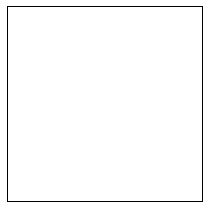

0200-Low weight variance-Spiky insertions and deletions-Single level-Low weight change


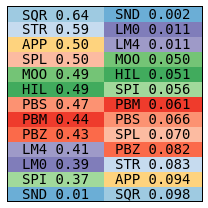

0201-Low weight variance-Spiky insertions and deletions-Single level-Regular weight change


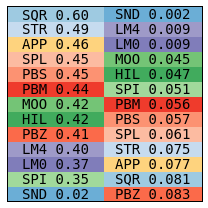

0202-Low weight variance-Spiky insertions and deletions-Single level-Spiky weight change


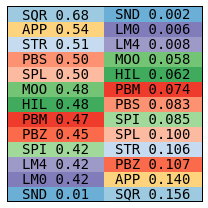

0210-Low weight variance-Spiky insertions and deletions-2 or 3 levels-Low weight change


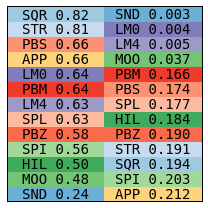

0211-Low weight variance-Spiky insertions and deletions-2 or 3 levels-Regular weight change


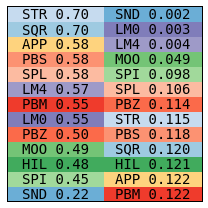

0212-Low weight variance-Spiky insertions and deletions-2 or 3 levels-Spiky weight change


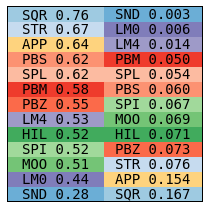

0220-Low weight variance-Spiky insertions and deletions-4+ levels-Low weight change


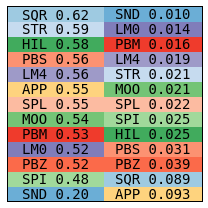

0221-Low weight variance-Spiky insertions and deletions-4+ levels-Regular weight change


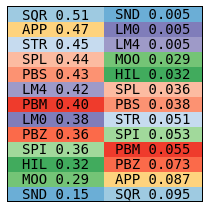

0222-Low weight variance-Spiky insertions and deletions-4+ levels-Spiky weight change


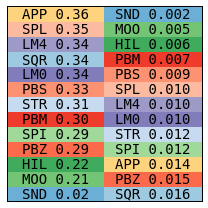

1000-High weight variance-Low insertions and deletions-Single level-Low weight change


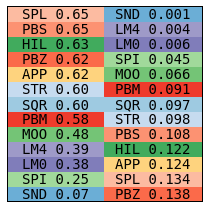

1001-High weight variance-Low insertions and deletions-Single level-Regular weight change


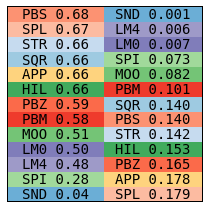

1002-High weight variance-Low insertions and deletions-Single level-Spiky weight change


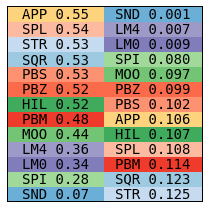

1010-High weight variance-Low insertions and deletions-2 or 3 levels-Low weight change


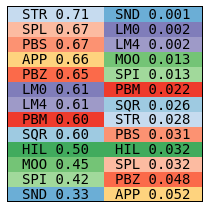

1011-High weight variance-Low insertions and deletions-2 or 3 levels-Regular weight change


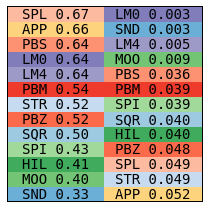

1012-High weight variance-Low insertions and deletions-2 or 3 levels-Spiky weight change


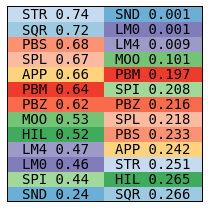

1020-High weight variance-Low insertions and deletions-4+ levels-Low weight change


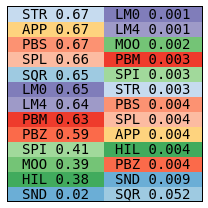

1021-High weight variance-Low insertions and deletions-4+ levels-Regular weight change


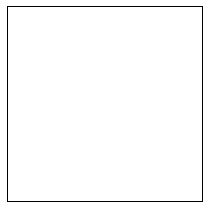

1022-High weight variance-Low insertions and deletions-4+ levels-Spiky weight change


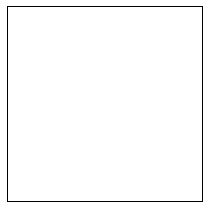

1100-High weight variance-Regular insertions and deletions-Single level-Low weight change


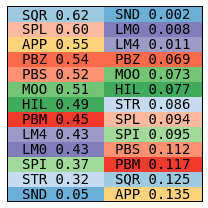

1101-High weight variance-Regular insertions and deletions-Single level-Regular weight change


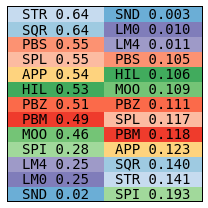

1102-High weight variance-Regular insertions and deletions-Single level-Spiky weight change


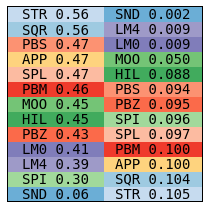

1110-High weight variance-Regular insertions and deletions-2 or 3 levels-Low weight change


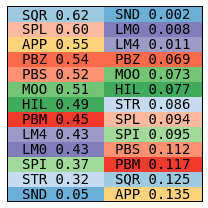

1111-High weight variance-Regular insertions and deletions-2 or 3 levels-Regular weight change


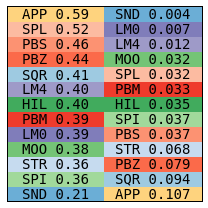

1112-High weight variance-Regular insertions and deletions-2 or 3 levels-Spiky weight change


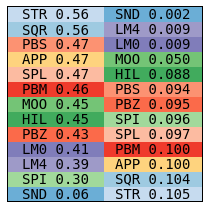

1120-High weight variance-Regular insertions and deletions-4+ levels-Low weight change


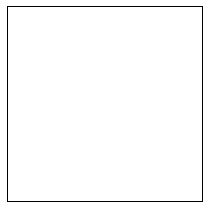

1121-High weight variance-Regular insertions and deletions-4+ levels-Regular weight change


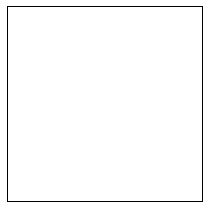

1122-High weight variance-Regular insertions and deletions-4+ levels-Spiky weight change


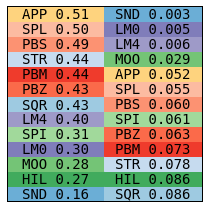

1200-High weight variance-Spiky insertions and deletions-Single level-Low weight change


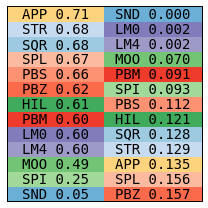

1201-High weight variance-Spiky insertions and deletions-Single level-Regular weight change


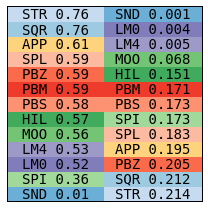

1202-High weight variance-Spiky insertions and deletions-Single level-Spiky weight change


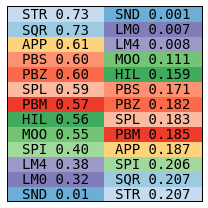

1210-High weight variance-Spiky insertions and deletions-2 or 3 levels-Low weight change


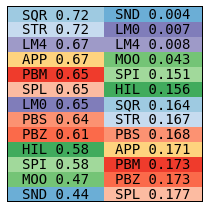

1211-High weight variance-Spiky insertions and deletions-2 or 3 levels-Regular weight change


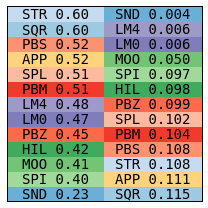

1212-High weight variance-Spiky insertions and deletions-2 or 3 levels-Spiky weight change


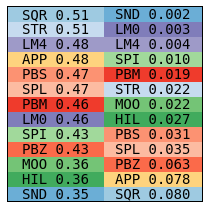

1220-High weight variance-Spiky insertions and deletions-4+ levels-Low weight change


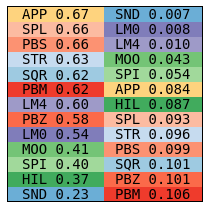

1221-High weight variance-Spiky insertions and deletions-4+ levels-Regular weight change


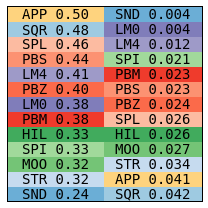

1222-High weight variance-Spiky insertions and deletions-4+ levels-Spiky weight change


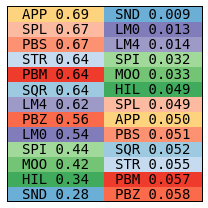

In [81]:

for n1, a in enumerate(sizeVarianceCategories):
    for n2, b in enumerate(dataChangeCategories):
        for n3, c in enumerate(depthCategories):
            for n4, d in enumerate(sizeChangeCategories):
               
                filtered = averages[(averages['sizeVarianceCategory'] == a) &
                              (averages['dataChangeCategory'] == b) & 
                              (averages['depthCategory'] == c) & 
                              (averages['sizeChangeCategory'] == d)]
                
                _a = a.replace('variance', 'weight variance')
                _b = b.replace('data change', 'insertions and deletions')
                _d = d.replace('size change', 'weight change')
                combination_string = '{}{}{}{}-{}-{}-{}-{}'.format(n1, n2, n3, n4, _a, _b, c, _d)
                
                print(combination_string, sep=', ')
#                 display(filtered)
#                 draw_bar_chart(filtered, combination_string, False)
                draw_rank_chart(filtered, combination_string, True)
#                 display(filtered)
#                 break
#             break
#         break
#     break

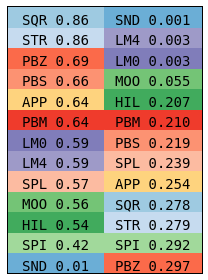

In [ ]:
!spd-say done